In [36]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

data collection and processing


In [37]:
heart_data = pd.read_csv('/content/data.csv')


In [38]:
heart_data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [39]:
heart_data.shape

(303, 14)

In [40]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [41]:
#checking missing value
heart_data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [42]:
#statical measures of data
heart_data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [43]:
#checking the distribution of output variable
heart_data['output'].value_counts()

1    165
0    138
Name: output, dtype: int64

output 
1-defective heart
0-healthy heart

In [44]:
#spiltting the features and output
x= heart_data.drop(columns='output',axis=1)
y=heart_data['output']

In [45]:
x

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [46]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: output, Length: 303, dtype: int64

splitting the data into training data and test data

In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)

In [48]:
x.shape

(303, 13)

In [49]:
x_train.shape

(242, 13)

In [50]:
x_test.shape

(61, 13)

Model training

In [51]:
model= LogisticRegression()

In [52]:
#training the LogisticRegression  model with training data
model.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Model evaluation

In [53]:
#accuracy on training data
x_train_prediction=model.predict(x_train)
training_data_accuracy=accuracy_score(x_train_prediction,y_train)

In [54]:
training_data_accuracy

0.8512396694214877

In [55]:
#accuracy on test data
x_test_prediction=model.predict(x_test)
test_data_accuracy=accuracy_score(x_test_prediction,y_test)
test_data_accuracy

0.819672131147541

building predective system

In [56]:
input_data=(41,0,1,130,204,0,0,172,0,1.4,2,0,2)
#change the input data to a numpy array
input_data_as_numpy_array=np.asarray(input_data)
#reshape the numpy array as we are predecting for only one instance
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
predection=model.predict(input_data_reshaped)
predection

array([1])

In [57]:
if (predection[0]==0):
  print('The person does not have a Heart Disease')
else:
  print('The person have Heart Disease')
    

The person have Heart Disease


**Data Visulization**

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


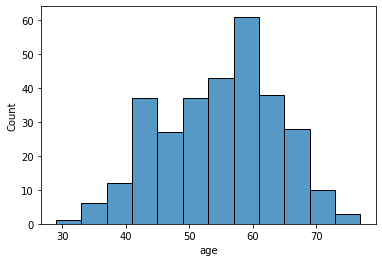

In [60]:
sns.histplot(x="age",data=heart_data);


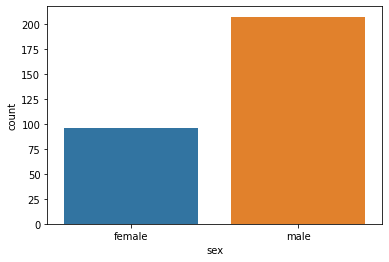

In [61]:
sns.countplot(x="sex",data=heart_data);
plt.xticks(ticks=[0,1],labels=["female","male"])
plt.show()

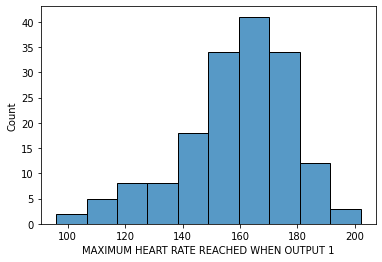

In [65]:
df2=heart_data[heart_data["output"]==1]
sns.histplot(df2["thalachh"],bins=10);
plt.xlabel("MAXIMUM HEART RATE REACHED WHEN OUTPUT 1")
plt.show()

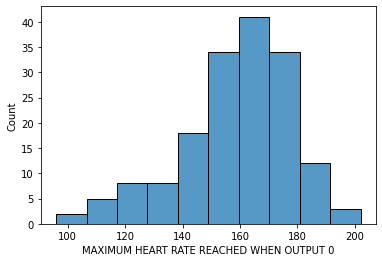

In [66]:
df3=heart_data[heart_data["output"]==1]
sns.histplot(df3["thalachh"],bins=10);
plt.xlabel("MAXIMUM HEART RATE REACHED WHEN OUTPUT 0")
plt.show()

In [67]:
s=heart_data["sex"].value_counts().reset_index()
px.pie(s,names="index",values="sex",title="%AGE OF MALE AND FEMALE PATIENTS:")

**EFFECT OF HEART ATTACK WITH INCREASE IN AGE AND MAXIMUM HEART RATE**

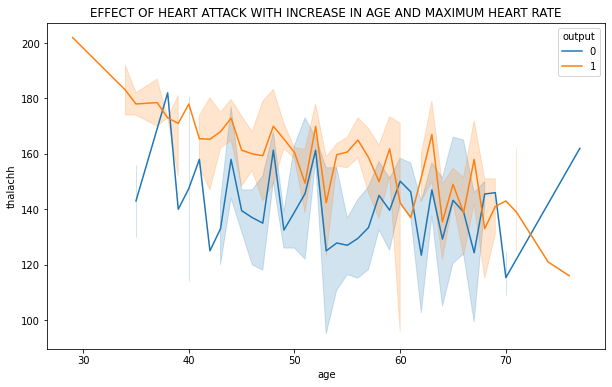

In [68]:
plt.figure(figsize=(10,6))
sns.lineplot(x="age",y="thalachh",hue="output",data=heart_data)
plt.title("EFFECT OF HEART ATTACK WITH INCREASE IN AGE AND MAXIMUM HEART RATE")
plt.show()

**EFFECT OF HEART ATTACK WITH INCREASE IN AGE AND CHOLESTROL**

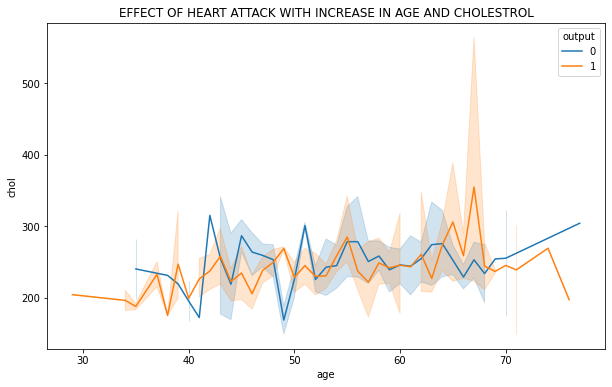

In [71]:
plt.figure(figsize=(10,6))
sns.lineplot(x="age",y="chol",hue="output",data=heart_data)
plt.title("EFFECT OF HEART ATTACK WITH INCREASE IN AGE AND CHOLESTROL")
plt.show()



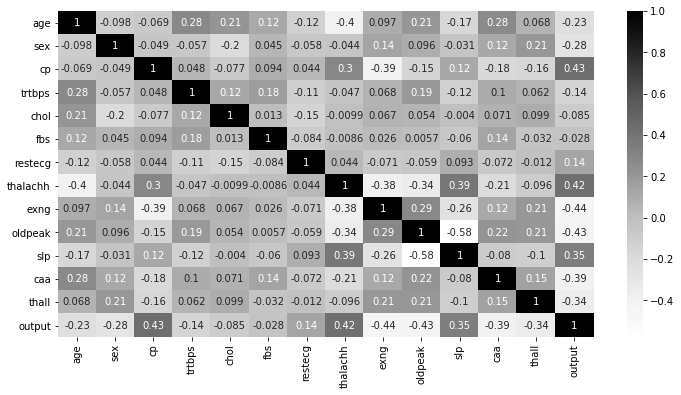

In [73]:
figure = plt.figure(figsize=(12,6))

sns.heatmap(heart_data.corr(),data = heart_data,annot= True,cmap = 'Greys')